# Fetching MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

Plotting the first training instance

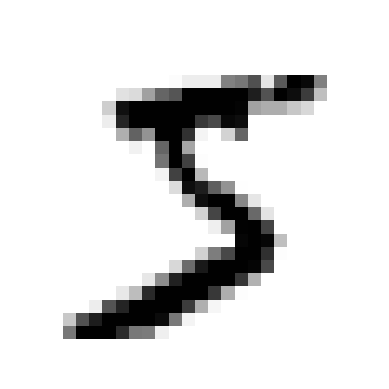

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training with GridSearchCV to determine hyperparameters. On a first iteration hyperparameters weights='distance' and 'n_neighbors' = 3 got the best score. Now training a second iteration to narrow down on the best 'n_neighbors' value (since on first iteration only values 1,3,5 and 7 were tested).

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[2, 3, 4, 5]}
neigh = KNeighborsClassifier(weights='distance')
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [2, 3, 4, 5]})

In [10]:
clf.best_params_

{'n_neighbors': 4}

In [11]:
import pandas as pd
cv_res = pd.DataFrame(clf.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.155364,0.003253,5.957810,0.021739,4,{'n_neighbors': 4},0.973000,0.972250,0.969917,0.970917,0.972000,0.971617,0.001081,1
1,0.157592,0.004801,6.147936,0.252370,3,{'n_neighbors': 3},0.972333,0.971667,0.970083,0.970083,0.971417,0.971117,0.000895,2
3,0.154986,0.002329,5.971869,0.015979,5,{'n_neighbors': 5},0.970333,0.971333,0.970333,0.969417,0.970667,0.970417,0.000619,3
0,0.154922,0.002009,6.196082,0.228842,2,{'n_neighbors': 2},0.969833,0.970750,0.968667,0.969417,0.968333,0.969400,0.000859,4


### Accuracy score on test set.

In [22]:
clf.best_estimator_.score(X_test, y_test)

0.9714